In [127]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import random
import cv2
from skimage.io import imread
import os

In [181]:
df = pd.read_csv('train.csv')
df

,id,clip_count
0,30001,11
1,30002,2
2,30003,26
3,30004,41
4,30005,49
...,...,...
14995,44996,29
14996,44997,1
14997,44998,57
14998,44999,53


In [182]:
ROOT_PATH = os.getcwd()

TRAIN_PATH = ROOT_PATH + "\\train\\"
TEST_PATH = ROOT_PATH + "\\test\\"

Creo una columna filepath para que mi máquina relacione el clip_count con la imagen

In [183]:
df["filepath"] = df["id"].astype(str).apply(lambda x: TRAIN_PATH + f"clips-{x}.png")

In [184]:
df

,id,clip_count,filepath
0,30001,11,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
1,30002,2,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
2,30003,26,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
3,30004,41,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
4,30005,49,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
...,...,...,...
14995,44996,29,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
14996,44997,1,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
14997,44998,57,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
14998,44999,53,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...


Aqui compruebo que las imagenes estan relacionadas con cada casilla del DataFrame

In [185]:
filenames = os.listdir(TRAIN_PATH)

In [186]:
filenames

['clips-30001.png',
 'clips-30002.png',
 'clips-30003.png',
 'clips-30004.png',
 'clips-30005.png',
 'clips-30006.png',
 'clips-30007.png',
 'clips-30008.png',
 'clips-30009.png',
 'clips-30010.png',
 'clips-30011.png',
 'clips-30012.png',
 'clips-30013.png',
 'clips-30014.png',
 'clips-30015.png',
 'clips-30016.png',
 'clips-30017.png',
 'clips-30018.png',
 'clips-30019.png',
 'clips-30020.png',
 'clips-30021.png',
 'clips-30022.png',
 'clips-30023.png',
 'clips-30024.png',
 'clips-30025.png',
 'clips-30026.png',
 'clips-30027.png',
 'clips-30028.png',
 'clips-30029.png',
 'clips-30030.png',
 'clips-30031.png',
 'clips-30032.png',
 'clips-30033.png',
 'clips-30034.png',
 'clips-30035.png',
 'clips-30036.png',
 'clips-30037.png',
 'clips-30038.png',
 'clips-30039.png',
 'clips-30040.png',
 'clips-30041.png',
 'clips-30042.png',
 'clips-30043.png',
 'clips-30044.png',
 'clips-30045.png',
 'clips-30046.png',
 'clips-30047.png',
 'clips-30048.png',
 'clips-30049.png',
 'clips-30050.png',


(256, 256, 4)
255


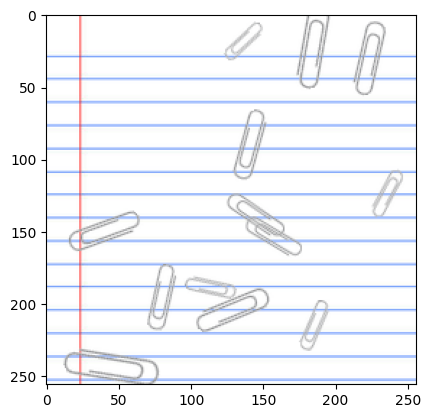

In [187]:
sample = random.choice(filenames)
image = imread(TRAIN_PATH + sample)

print(image.shape)
print(np.max(image))
plt.imshow(image);

In [135]:
image

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[155, 185, 251, 255],
        [155, 185, 251, 255],
        [155, 185, 251, 255],
        ...,
        [155, 185, 251, 255],
        [155, 185, 251, 255],
        [155, 185, 251, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[244

Miro el shape de las imagenes

Tamaño imagen original: (256, 256, 4)
Tamaño imagen reshape: (128, 128, 4)


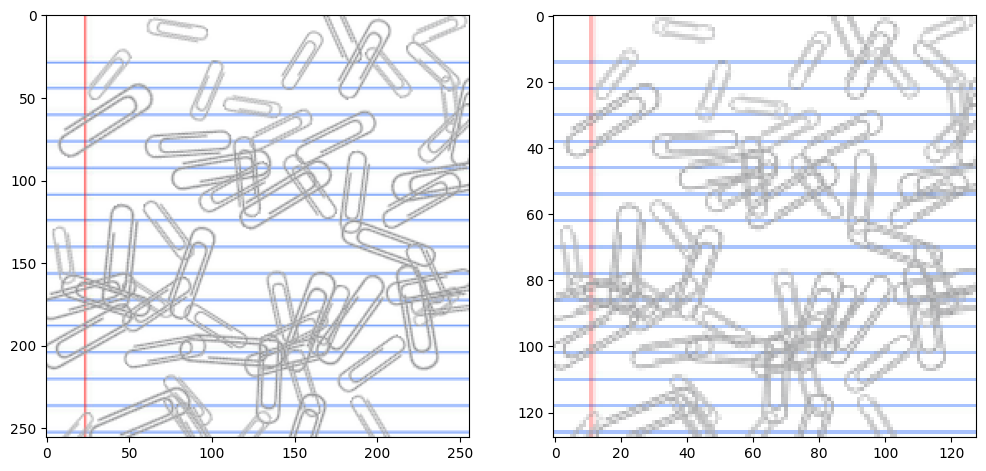

In [136]:
plt.figure(figsize=(12, 12))

sample = random.choice(filenames)
image = imread(TRAIN_PATH + sample)
imagesmall = cv2.resize(image, (128, 128))

print("Tamaño imagen original:", image.shape)
print("Tamaño imagen reshape:", imagesmall.shape)

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(imagesmall);

Tamaño imagen original: (256, 256)


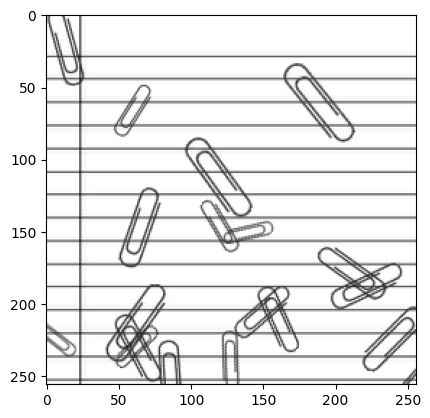

In [137]:
sample = random.choice(filenames)

image = cv2.imread(filename = TRAIN_PATH + sample, flags = cv2.IMREAD_GRAYSCALE)

print("Tamaño imagen original:", image.shape)
plt.imshow(image, cmap='gray');

In [138]:
X=[]
for filename in filenames:
    sample = filename
    image = imread(TRAIN_PATH + sample)
    imagesmall = cv2.resize(image, (128, 128))
    gray_image = cv2.imread(filename = TRAIN_PATH + sample, flags = cv2.IMREAD_GRAYSCALE)
    X.append(gray_image)

In [139]:
y = df['clip_count']
y

0        11
1         2
2        26
3        41
4        49
         ..
14995    29
14996     1
14997    57
14998    53
14999    55
Name: clip_count, Length: 15000, dtype: int64

In [140]:
X = np.array(X)
y = np.array(y)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 256, 256)
(3000, 256, 256)
(12000,)
(3000,)


In [156]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 99
Max: 255


In [157]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.38823529411764707
Max: 1.0


In [145]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")

In [165]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape = (256,256,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = "mse",
    metrics = ["mae"]
)

In [163]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)              │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 125, 125, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,497,601 (28.60 MB)

 Trainable params: 7,497,601 (28.60 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=5, restore_best_weights=True)

In [150]:
from keras.callbacks import ModelCheckpoint
mcheckpoint = ModelCheckpoint("callback_model.keras", save_best_only=True)

In [166]:
history = model.fit(X_train,
         y_train,
         epochs = 50,
         batch_size = 128,
         callbacks = [earlystop, mcheckpoint],
         validation_split = 0.2)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - loss: 423.5991 - mae: 16.4945 - val_loss: 24.4438 - val_mae: 3.8948
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - loss: 30.0302 - mae: 4.0747 - val_loss: 33.0402 - val_mae: 4.5293
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - loss: 17.1698 - mae: 3.1008 - val_loss: 14.4832 - val_mae: 2.9072
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - loss: 12.5238 - mae: 2.6595 - val_loss: 13.5084 - val_mae: 2.7554
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - loss: 12.3992 - mae: 2.6276 - val_loss: 11.3772 - val_mae: 2.5279
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - loss: 13.0587 - mae: 2.6871 - val_loss: 16.1144 - val_mae: 2.9610
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - loss: 11.4407 - mae: 2.5218 - val_loss: 13.9894 - val_mae: 2.7785
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 901s 12s/step - loss: 13.1477 - mae: 2.6964 - val_loss: 26.0256 - val_mae: 3.9436
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 165s 2s

In [167]:
model.evaluate(X_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 8.5436 - mae: 2.1834


[8.543582916259766, 2.1834428310394287]

In [168]:
model.predict(X_test).round(0)

94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step


array([[44.],
       [16.],
       [21.],
       ...,
       [41.],
       [20.],
       [ 7.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).round(0))

94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step


array([[ 0, 42,  0, ...,  0,  0,  0],
       [ 0, 18, 28, ...,  0,  0,  0],
       [ 0,  2, 15, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [169]:
df_test  = pd.read_csv('test.csv')
df_test

,id
0,45001
1,45002
2,45003
3,45004
4,45005
...,...
4995,49996
4996,49997
4997,49998
4998,49999


In [170]:
df_test["filepath"] = df_test["id"].astype(str).apply(lambda x: TRAIN_PATH + f"clips-{x}.png")
df_test

,id,filepath
0,45001,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
1,45002,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
2,45003,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
3,45004,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
4,45005,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
...,...,...
4995,49996,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
4996,49997,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
4997,49998,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...
4998,49999,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...


In [171]:
filenames = os.listdir(TEST_PATH)
filenames

['clips-45001.png',
 'clips-45002.png',
 'clips-45003.png',
 'clips-45004.png',
 'clips-45005.png',
 'clips-45006.png',
 'clips-45007.png',
 'clips-45008.png',
 'clips-45009.png',
 'clips-45010.png',
 'clips-45011.png',
 'clips-45012.png',
 'clips-45013.png',
 'clips-45014.png',
 'clips-45015.png',
 'clips-45016.png',
 'clips-45017.png',
 'clips-45018.png',
 'clips-45019.png',
 'clips-45020.png',
 'clips-45021.png',
 'clips-45022.png',
 'clips-45023.png',
 'clips-45024.png',
 'clips-45025.png',
 'clips-45026.png',
 'clips-45027.png',
 'clips-45028.png',
 'clips-45029.png',
 'clips-45030.png',
 'clips-45031.png',
 'clips-45032.png',
 'clips-45033.png',
 'clips-45034.png',
 'clips-45035.png',
 'clips-45036.png',
 'clips-45037.png',
 'clips-45038.png',
 'clips-45039.png',
 'clips-45040.png',
 'clips-45041.png',
 'clips-45042.png',
 'clips-45043.png',
 'clips-45044.png',
 'clips-45045.png',
 'clips-45046.png',
 'clips-45047.png',
 'clips-45048.png',
 'clips-45049.png',
 'clips-45050.png',


In [174]:
X=[]
for filename in filenames:
    sample = filename
    image = imread(TEST_PATH + sample)
    gray_image = cv2.imread(filename = TEST_PATH + sample, flags = cv2.IMREAD_GRAYSCALE)
    X.append(gray_image)

X = np.array(X)

(256, 256)

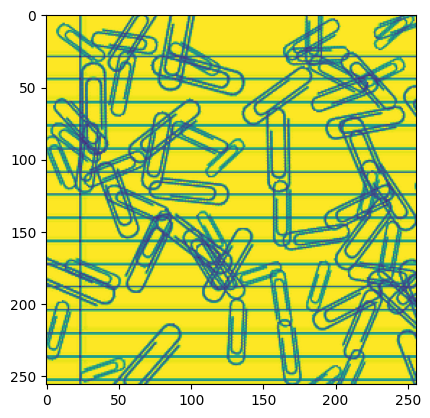

In [192]:
plt.imshow(X[0])
X[0].shape

In [175]:
X = X/255

In [176]:
y_pred = model.predict(X).round(0)
y_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step


array([[69.],
       [42.],
       [47.],
       ...,
       [70.],
       [23.],
       [37.]], dtype=float32)

In [177]:
df_test['clip_count'] = y_pred
df_test

,id,filepath,clip_count
0,45001,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,69.0
1,45002,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,42.0
2,45003,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,47.0
3,45004,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,38.0
4,45005,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,17.0
...,...,...,...
4995,49996,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,35.0
4996,49997,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,57.0
4997,49998,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,70.0
4998,49999,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,23.0


In [178]:
df_test['clip_count'] = df_test['clip_count'].astype(int)
df_test

,id,filepath,clip_count
0,45001,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,69
1,45002,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,42
2,45003,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,47
3,45004,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,38
4,45005,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,17
...,...,...,...
4995,49996,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,35
4996,49997,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,57
4997,49998,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,70
4998,49999,c:\Users\yanju\Online_env\REPO_PRUEBA\ONLINE_D...,23


In [179]:
df_test.drop(columns='filepath', inplace=True)
df_test

,id,clip_count
0,45001,69
1,45002,42
2,45003,47
3,45004,38
4,45005,17
...,...,...
4995,49996,35
4996,49997,57
4997,49998,70
4998,49999,23


In [180]:
df_test.to_csv("entrega_gris.csv", index=False)